# Education

For my metric I decided to look at the education of each neighborhood. In order to do this I chose to focus on both the total number of students enrolled as well as the percentage of students enrolled based on the population of each neighborhood.

First, let's see what the dataset looks like:

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("school.csv")
df

,Neighborhood,Id,Estimate; Total:,Margin of Error; Total:,Estimate; Enrolled in school:,Margin of Error; Enrolled in school:,"Estimate; Enrolled in school: - Enrolled in nursery school, preschool","Margin of Error; Enrolled in school: - Enrolled in nursery school, preschool",Estimate; Enrolled in school: - Enrolled in kindergarten,Margin of Error; Enrolled in school: - Enrolled in kindergarten,...,Estimate; Enrolled in school: - Enrolled in grade 11,Margin of Error; Enrolled in school: - Enrolled in grade 11,Estimate; Enrolled in school: - Enrolled in grade 12,Margin of Error; Enrolled in school: - Enrolled in grade 12,"Estimate; Enrolled in school: - Enrolled in college, undergraduate years","Margin of Error; Enrolled in school: - Enrolled in college, undergraduate years",Estimate; Enrolled in school: - Graduate or professional school,Margin of Error; Enrolled in school: - Graduate or professional school,Estimate; Not enrolled in school,Margin of Error; Not enrolled in school
0,Allegheny Center,1,1389.0,193.000000,394.0,120.000000,48.0,29.000000,0.0,10.000000,...,0.0,10.000000,21.0,32.000000,150.0,60.000000,51.0,35.000000,995.0,135.000000
1,Allegheny West,2,343.0,96.000000,61.0,44.000000,0.0,10.000000,0.0,10.000000,...,9.0,12.000000,0.0,10.000000,2.0,4.000000,25.0,22.000000,282.0,74.000000
2,Allentown,3,2520.0,449.503059,965.0,312.800256,19.0,22.825424,23.0,28.722813,...,41.0,53.823787,81.0,72.718636,125.0,87.120606,74.0,101.469207,1555.0,267.807767
3,Arlington,4,1823.0,342.302498,427.0,127.722355,7.0,17.916473,6.0,17.916473,...,37.0,27.000000,17.0,27.856777,142.0,69.231496,16.0,18.493242,1396.0,267.159129
4,Arlington Heights,5,213.0,115.000000,40.0,49.000000,28.0,49.000000,0.0,10.000000,...,0.0,10.000000,0.0,10.000000,12.0,14.000000,0.0,10.000000,173.0,87.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,Upper Lawrenceville,87,2662.0,391.154701,625.0,206.211057,82.0,69.455021,18.0,32.264532,...,52.0,45.705580,45.0,46.346521,85.0,53.497664,98.0,57.913729,2037.0,274.100347
87,West End,88,235.0,138.000000,71.0,60.000000,0.0,10.000000,0.0,10.000000,...,0.0,10.000000,0.0,10.000000,71.0,60.000000,0.0,10.000000,164.0,101.000000
88,West Oakland,89,1681.0,280.850494,791.0,229.002183,17.0,20.591260,0.0,14.142136,...,3.0,11.180340,13.0,23.259407,508.0,211.123187,148.0,69.634761,890.0,149.241415
89,Westwood,90,3303.0,370.276923,629.0,189.200951,75.0,56.044625,65.0,61.619802,...,33.0,24.596748,0.0,14.142136,178.0,77.781746,13.0,20.591260,2674.0,256.095685


There's a lot of unnecessary data in here so let's only focus on the **total** number of students enrolled in school rather than breaking it down by grade level.

In [32]:
df = df.drop(df.columns[5:], axis=1)
df = df.drop(df.columns[[1, 3]], axis=1)
df

,Neighborhood,Estimate; Total:,Estimate; Enrolled in school:
0,Allegheny Center,1389.0,394.0
1,Allegheny West,343.0,61.0
2,Allentown,2520.0,965.0
3,Arlington,1823.0,427.0
4,Arlington Heights,213.0,40.0
...,...,...,...
86,Upper Lawrenceville,2662.0,625.0
87,West End,235.0,71.0
88,West Oakland,1681.0,791.0
89,Westwood,3303.0,629.0


That looks so much cleaner! Now let's sort them by the total number of students enrolled in school.

In [33]:
df = df.sort_values(by=['Estimate; Enrolled in school:'], ascending = [False])
df

,Neighborhood,Estimate; Total:,Estimate; Enrolled in school:
56,North Oakland,9565.0,7192.0
76,Squirrel Hill North,11072.0,5901.0
68,Shadyside,13290.0,4694.0
19,Central Oakland,5822.0,4656.0
77,Squirrel Hill South,15510.0,4541.0
...,...,...,...
4,Arlington Heights,213.0,40.0
67,Ridgemont,277.0,31.0
57,North Shore,205.0,12.0
71,South Shore,12.0,4.0


Now we can assign a ranking based on how many total students are enrolled in school and display the top 10.

In [34]:
df['Total Students Rank'] = df['Estimate; Enrolled in school:'].rank(ascending = False)
top_ten_total = df.head(10)
top_ten_total

,Neighborhood,Estimate; Total:,Estimate; Enrolled in school:,Total Students Rank
56,North Oakland,9565.0,7192.0,1.0
76,Squirrel Hill North,11072.0,5901.0,2.0
68,Shadyside,13290.0,4694.0,3.0
19,Central Oakland,5822.0,4656.0,4.0
77,Squirrel Hill South,15510.0,4541.0,5.0
10,Bluff,6289.0,3625.0,6.0
13,Brookline,12777.0,2824.0,7.0
15,Carrick,9825.0,2274.0,8.0
9,Bloomfield,8498.0,2185.0,9.0
72,South Side Flats,6250.0,2091.0,10.0


Let's see this data represented visually

,Estimate; Total:,Estimate; Enrolled in school:,Total Students Rank
count,10.000000,10.000000,10.00000
mean,9889.800000,3998.300000,5.50000
std,3294.595433,1714.269268,3.02765
min,5822.000000,2091.000000,1.00000
25%,6841.250000,2411.500000,3.25000
50%,9695.000000,4083.000000,5.50000
75%,12350.750000,4684.500000,7.75000
max,15510.000000,7192.000000,10.00000


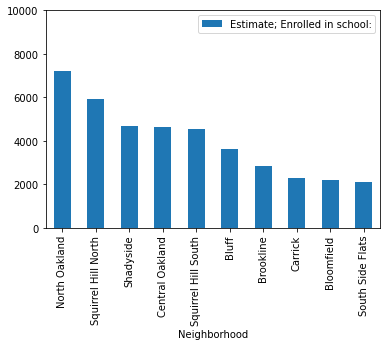

In [35]:
i = top_ten_total.set_index("Neighborhood")
i.plot(kind='bar', y= 'Estimate; Enrolled in school:', ylim = [0, 10000])
i.describe()

As you can see, **North Oakland** is the winner based on total students.\
However, this is heavily based on the population of each neighborhood because neighborhoods with more people will naturally have more students enrolled in schools.\
Thus, we also need to look at the percentage of students enrolled compared to the total population.

In [36]:
percentages = []
for en, total in zip(df['Estimate; Enrolled in school:'], df['Estimate; Total:']):
    percentages.append(en/total)
len(percentages)
df.insert(loc = 4, column = 'Percent Enrolled', value = percentages)
df

,Neighborhood,Estimate; Total:,Estimate; Enrolled in school:,Total Students Rank,Percent Enrolled
56,North Oakland,9565.0,7192.0,1.0,0.751908
76,Squirrel Hill North,11072.0,5901.0,2.0,0.532966
68,Shadyside,13290.0,4694.0,3.0,0.353198
19,Central Oakland,5822.0,4656.0,4.0,0.799725
77,Squirrel Hill South,15510.0,4541.0,5.0,0.292779
...,...,...,...,...,...
4,Arlington Heights,213.0,40.0,87.0,0.187793
67,Ridgemont,277.0,31.0,88.0,0.111913
57,North Shore,205.0,12.0,89.0,0.058537
71,South Shore,12.0,4.0,90.0,0.333333


Now we need to rank them based on their percentages:

In [37]:
df['Percentage Rank'] = df['Percent Enrolled'].rank(ascending = False)
df = df.sort_values(by=['Percentage Rank'])
df

,Neighborhood,Estimate; Total:,Estimate; Enrolled in school:,Total Students Rank,Percent Enrolled,Percentage Rank
19,Central Oakland,5822.0,4656.0,4.0,0.799725,1.0
56,North Oakland,9565.0,7192.0,1.0,0.751908,2.0
83,Terrace Village,2277.0,1328.0,22.0,0.583224,3.0
10,Bluff,6289.0,3625.0,6.0,0.576403,4.0
70,South Oakland,2910.0,1598.0,14.0,0.549141,5.0
...,...,...,...,...,...,...
5,Banksville,3787.0,402.0,55.0,0.106153,87.0
65,Polish Hill,1297.0,126.0,77.0,0.097147,88.0
80,Strip District,740.0,55.0,86.0,0.074324,89.0
57,North Shore,205.0,12.0,89.0,0.058537,90.0


And here's the top ten for this category:

In [38]:
top_ten_percent = df.head(10)
top_ten_percent

,Neighborhood,Estimate; Total:,Estimate; Enrolled in school:,Total Students Rank,Percent Enrolled,Percentage Rank
19,Central Oakland,5822.0,4656.0,4.0,0.799725,1.0
56,North Oakland,9565.0,7192.0,1.0,0.751908,2.0
83,Terrace Village,2277.0,1328.0,22.0,0.583224,3.0
10,Bluff,6289.0,3625.0,6.0,0.576403,4.0
70,South Oakland,2910.0,1598.0,14.0,0.549141,5.0
76,Squirrel Hill North,11072.0,5901.0,2.0,0.532966,6.0
88,West Oakland,1681.0,791.0,36.0,0.470553,7.0
40,Homewood North,3055.0,1276.0,23.0,0.417676,8.0
16,Central Business District,4037.0,1685.0,13.0,0.417389,9.0
58,Northview Heights,1454.0,560.0,48.0,0.385144,10.0


Here's the top ten represented visually:

,Estimate; Total:,Estimate; Enrolled in school:,Total Students Rank,Percent Enrolled,Percentage Rank
count,10.000000,10.000000,10.000000,10.000000,10.00000
mean,4816.200000,2861.200000,16.900000,0.548413,5.50000
std,3329.846336,2338.680578,15.559563,0.138957,3.02765
min,1454.000000,560.000000,1.000000,0.385144,1.00000
25%,2435.250000,1289.000000,4.500000,0.430895,3.25000
50%,3546.000000,1641.500000,13.500000,0.541053,5.50000
75%,6172.250000,4398.250000,22.750000,0.581518,7.75000
max,11072.000000,7192.000000,48.000000,0.799725,10.00000


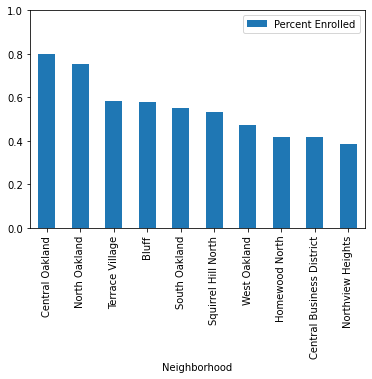

In [39]:
j = top_ten_percent.set_index("Neighborhood")
j.plot(kind='bar', y= 'Percent Enrolled', ylim = [0, 1])
j.describe()

As you can see, **Central Oakland** is the winner based on percentage enrolled.\
However, which neighborhood is better overall?\
To determine this, we need to give each neighborhood a ranking based on both metrics by adding them together.

In [40]:
final_rankings = []
for rank1, rank2 in zip(df['Total Students Rank'], df['Percentage Rank']):
    final_rankings.append(rank1 + rank2)
df.insert(loc = 6, column = 'Final Rankings', value = final_rankings)
df = df.sort_values(by=['Final Rankings']).reset_index(drop = True)
df

,Neighborhood,Estimate; Total:,Estimate; Enrolled in school:,Total Students Rank,Percent Enrolled,Percentage Rank,Final Rankings
0,North Oakland,9565.0,7192.0,1.0,0.751908,2.0,3.0
1,Central Oakland,5822.0,4656.0,4.0,0.799725,1.0,5.0
2,Squirrel Hill North,11072.0,5901.0,2.0,0.532966,6.0,8.0
3,Bluff,6289.0,3625.0,6.0,0.576403,4.0,10.0
4,Shadyside,13290.0,4694.0,3.0,0.353198,12.0,15.0
...,...,...,...,...,...,...,...
86,Hays,376.0,58.0,85.0,0.154255,81.0,166.0
87,Ridgemont,277.0,31.0,88.0,0.111913,86.0,174.0
88,Strip District,740.0,55.0,86.0,0.074324,89.0,175.0
89,North Shore,205.0,12.0,89.0,0.058537,90.0,179.0


So there we have it, **North Oakland** is the best neighborhood based on education. Let's see what the other metrics say to determine the final winner.

In [41]:
with open("Colin-ranking.csv", "w+") as f:
    f.write("RANK,NEIGHBORHOOD\n")
    for index, value in df["Neighborhood"].items():
        f.write(f"{index+1},{value}\n")

In [42]:
ranking = pd.read_csv("Colin-ranking.csv")
ranking.set_index('RANK')

,NEIGHBORHOOD
RANK,
1,North Oakland
2,Central Oakland
3,Squirrel Hill North
4,Bluff
5,Shadyside
...,...
87,Hays
88,Ridgemont
89,Strip District
